In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pylab as plt
%matplotlib inline
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import datasets

/kaggle/input/diabetes-progression-b1/sample_submission.csv
/kaggle/input/diabetes-progression-b1/train.csv
/kaggle/input/diabetes-progression-b1/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/diabetes-progression-b1/train.csv")
train_data.head()

,ID,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,1,-0.023677,-0.044642,-0.015906,-0.012556,0.020446,0.041274,-0.043401,0.034309,0.014072,-0.009362,151
1,2,-0.099961,-0.044642,-0.067641,-0.108957,-0.074494,-0.072712,0.015505,-0.039493,-0.049868,-0.009362,55
2,3,0.048974,0.050680,-0.030996,-0.049280,0.049341,-0.004132,0.133318,-0.053516,0.021311,0.019633,102
3,4,-0.085430,0.050680,-0.022373,0.001215,-0.037344,-0.026366,0.015505,-0.039493,-0.072128,-0.017646,49
4,5,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,152


In [3]:
train_data.isnull().sum()

ID     0
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64

In [4]:
test_data = pd.read_csv("/kaggle/input/diabetes-progression-b1/test.csv")
test_data.head()

,ID,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1,-0.023677,-0.044642,0.030440,-0.005671,0.082364,0.092004,-0.017629,0.071210,0.033047,0.003064
1,2,0.005383,-0.044642,0.059541,-0.056166,0.024574,0.052861,-0.043401,0.050914,-0.004220,-0.030072
2,3,0.012648,-0.044642,0.033673,0.033349,0.030078,0.027183,-0.002903,0.008847,0.031193,0.027917
3,4,0.009016,-0.044642,-0.032073,-0.026328,0.042462,-0.010395,0.159089,-0.076395,-0.011901,-0.038357
4,5,0.023546,0.050680,-0.030996,-0.005671,-0.016704,0.017788,-0.032356,-0.002592,-0.074089,-0.034215


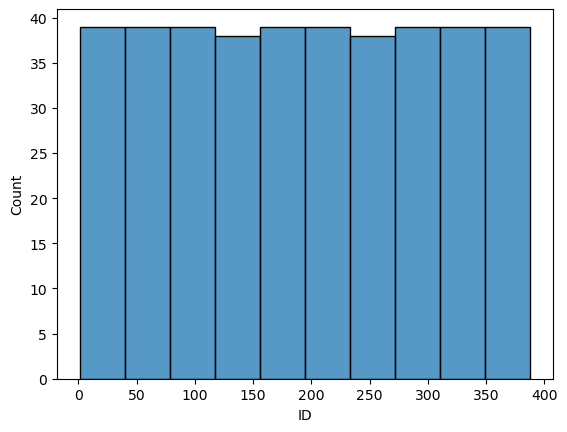

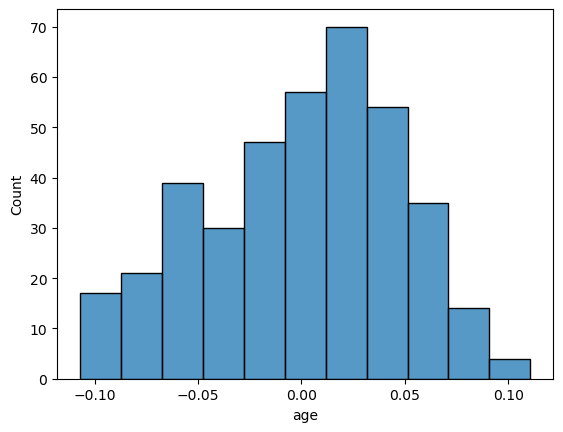

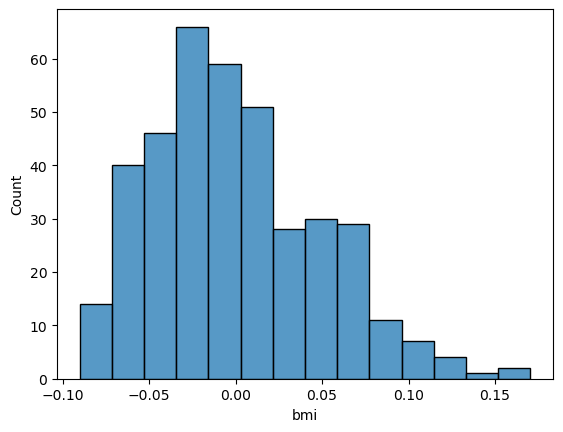

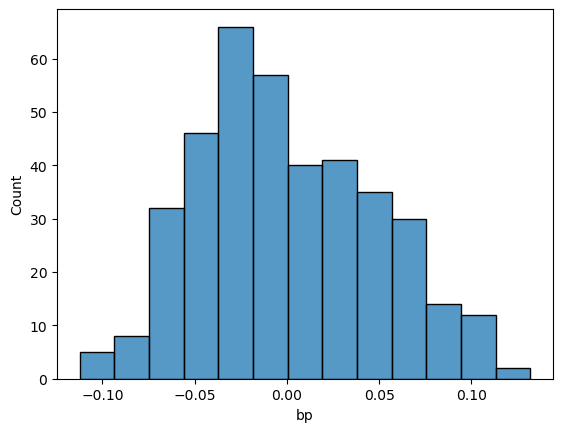

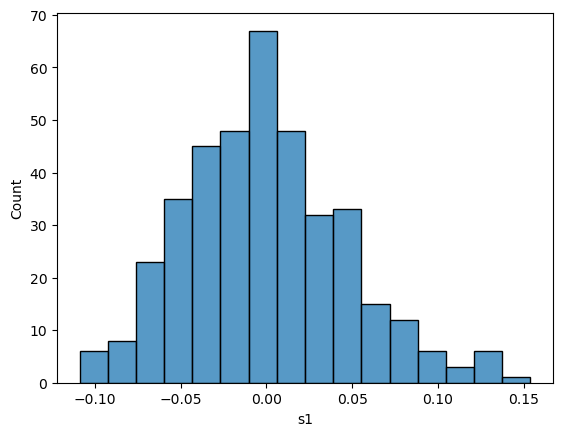

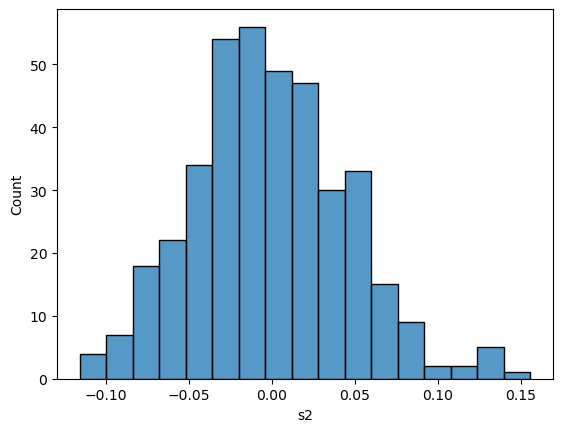

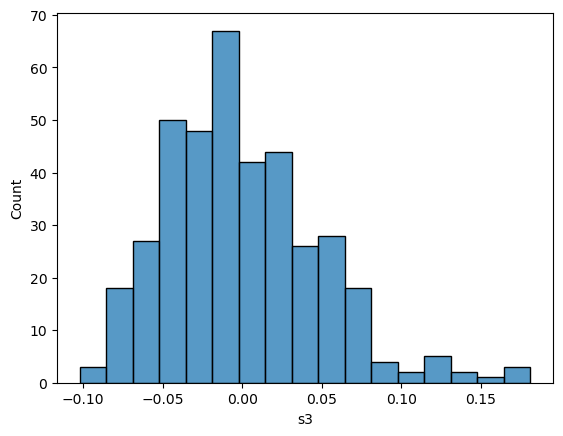

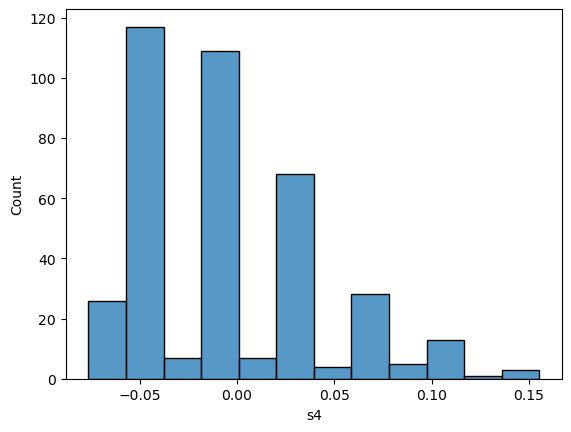

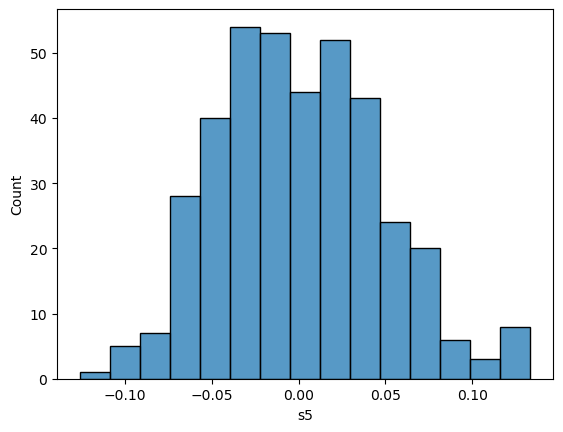

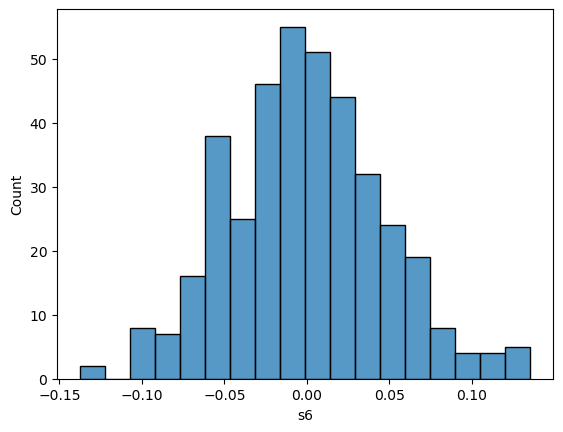

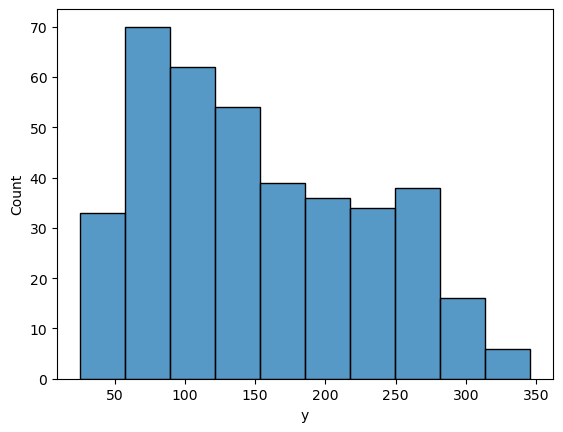

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in train_data.columns:
    if train_data[col].name != 'sex':
        sns.histplot(train_data[col])
        plt.show()

In [6]:
y = train_data['y']
X = train_data.drop('y', axis=1)
y
# they are already scaled

0      151
1       55
2      102
3       49
4      152
      ... 
383    219
384     52
385     55
386     71
387    275
Name: y, Length: 388, dtype: int64

In [7]:
X.shape

(388, 11)

In [8]:
y.shape

(388,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=0)
y_test

54     265
124    346
263    185
175    150
282     92
      ... 
90      64
210     68
106     59
247    154
249     75
Name: y, Length: 78, dtype: int64

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select=9)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('ID', False, 3),
 ('age', True, 1),
 ('sex', True, 1),
 ('bmi', True, 1),
 ('bp', True, 1),
 ('s1', True, 1),
 ('s2', True, 1),
 ('s3', True, 1),
 ('s4', True, 1),
 ('s5', True, 1),
 ('s6', False, 2)]

In [12]:
#To find the best number of folds when using K-Fold cross-validation
cv_scores = []
num_folds_range = range(5, 11)
for num_folds in num_folds_range:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
    model = LinearRegression()
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_scores.append((-1) * scores.mean())  # Store the average MSE (mean squared error)
    
best_num_folds = num_folds_range[cv_scores.index(min(cv_scores))]
best_num_folds

7

In [13]:
kfold = KFold(n_splits=best_num_folds, shuffle=True, random_state=0)
kfold

KFold(n_splits=7, random_state=0, shuffle=True)

In [14]:
# Perform cross-validation prediction on the training data
y_train_pred = cross_val_predict(model, X_train, y_train, cv=kfold)


In [15]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6125666801766549

In [16]:
X_test = test_data  # Assuming the test data contains the same features as the train data

In [17]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


# Define the range of alpha values
alpha_values = [0.1, 0.5, 1.0, 10.0]
rmse_scores = []
best_alpha = None
best_cv_score = float('inf')
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    fold_cv_scores = []
    fold_rmse_scores = []

    for train_index, val_index in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        fold_cv_scores.append(mean_squared_error(y_val_fold, y_val_pred))
        fold_rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred)))

    mean_cv_score = np.mean(fold_cv_scores)
    cv_scores.append(np.mean(fold_cv_scores))
    rmse_scores.append(np.mean(fold_rmse_scores))

if mean_cv_score < best_cv_score:
        best_cv_score = mean_cv_score
        best_alpha = alpha

# Train the Ridge regression model with the best alpha on the full training set
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test[:54], y_test_pred))

# Print the best alpha and test RMSE
print("Best alpha:", best_alpha)
print("Test RMSE:", test_rmse)


Best alpha: 10.0
Test RMSE: 83.60930053925742


In [18]:
s = pd.read_csv('/kaggle/input/diabetes-progression-b1/sample_submission.csv')
s.head()

,ID,y
0,1,100
1,2,100
2,3,100
3,4,100
4,5,100


In [21]:
# Create a submission file
submissions = pd.DataFrame({'ID': test_data.index, 'y': y_test_pred})
submissions['ID'] = submissions.index +1
# Save the submissions DataFrame to a CSV file
submissions.to_csv('submissions.csv', index=False)

In [22]:
submissions.head()

,ID,y
0,1,156.178427
1,2,151.208625
2,3,154.162092
3,4,133.361764
4,5,141.241985
